# Introducción a las Variables Aleatorias

## ¿Qué es una variable aleatoria?
 
**Intuitivamente**: 
- Una variable aleatoria es un **modelo matemático del comportamiento aleatorio** de un sistema. No representa la causa, sino **el resumen cuantitativo de lo que observamos**.
Podemos imaginarlas como una *'máquina'* que simula un experimento aleatorio y cada vez que la usas, te devuelve un resultado.

- En Python, esta máquina se representa con una función que puedes ejecutar cuantas veces quieras para obtener realizaciones.

In [8]:
import random
# Variable aleatoria uniforme discreta entre 1 y 6 (un dado)
def lanzar_dado():
    return random.randint(1, 6)

# Simular 10 tiros
resultados = [lanzar_dado() for _ in range(10)]
print(resultados)

[3, 1, 2, 1, 3, 4, 3, 1, 2, 5]


## Semillas

Cuando usamos funciones aleatorias en programación, en realidad no estamos obteniendo números realmente aleatorios, sino **pseudoaleatorios**. Es decir, los números son generados por un algoritmo **determinista** que imita la aleatoriedad.

La semilla es el punto de partida del algoritmo.

**¿Por qué usar semillas?**

- Para que tus simulaciones sean **reproducibles**: dos personas que usen el mismo código y la misma semilla obtendrán **resultados identicos**.

- Para depurar o probar código, ya que puedes repetir exactamente lo que ocurrió.

- Para comparar métodos bajo las mismas condiciones aleatorias.

In [9]:
import random

random.seed(42)  # Semilla fija
print([random.randint(1, 6) for _ in range(5)])

[6, 1, 1, 6, 3]


## Histogramas: herramientas para graficar el comportamiento de un fonémeno aleatorio

Un **histograma** es una gráfica que representa cómo se distribuyen los valores de una variable aleatoria en intervalos (llamados **bins**). Nos permite responder preguntas como:

- ¿Qué valores ocurren con mayor frecuencia?

- ¿Hay simetría o sesgo en los datos?

- ¿Los resultados se agrupan alrededor de cierto valor?

**Importante: Un histograma no muestra la probabilidad exacta, sino una estimación basada en una muestra finita de datos.**

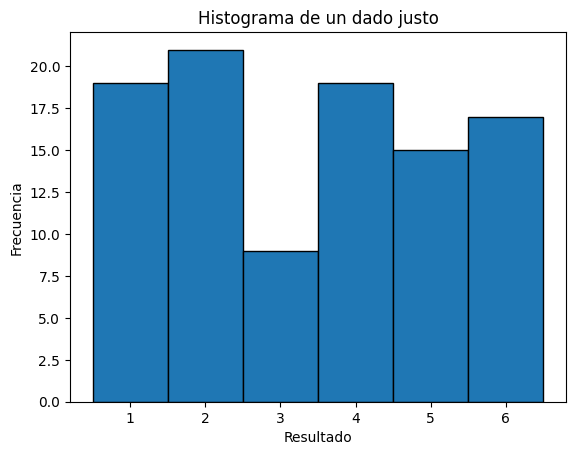

In [12]:
import matplotlib.pyplot as plt

n = 100
datos = [lanzar_dado() for _ in range(n)]
plt.hist(datos, bins=range(1, 8), edgecolor='black', align='left')
plt.title("Histograma de un dado justo")
plt.xlabel("Resultado")
plt.ylabel("Frecuencia")
plt.show()

## Frecuencia y frecuencia relativa

La **frecuencia** o **frecuencia absoluta** de un valor en un conjunto de datos es simplemente el número de veces que ese valor aparece.

La **frecuencia relativa** es la proporción de veces que aparece un valor respecto al total de observaciones. Se calcula como:
$$
Frecuencia relativa=\frac{Frecuencia absoluta}{Número total de datos}
​$$


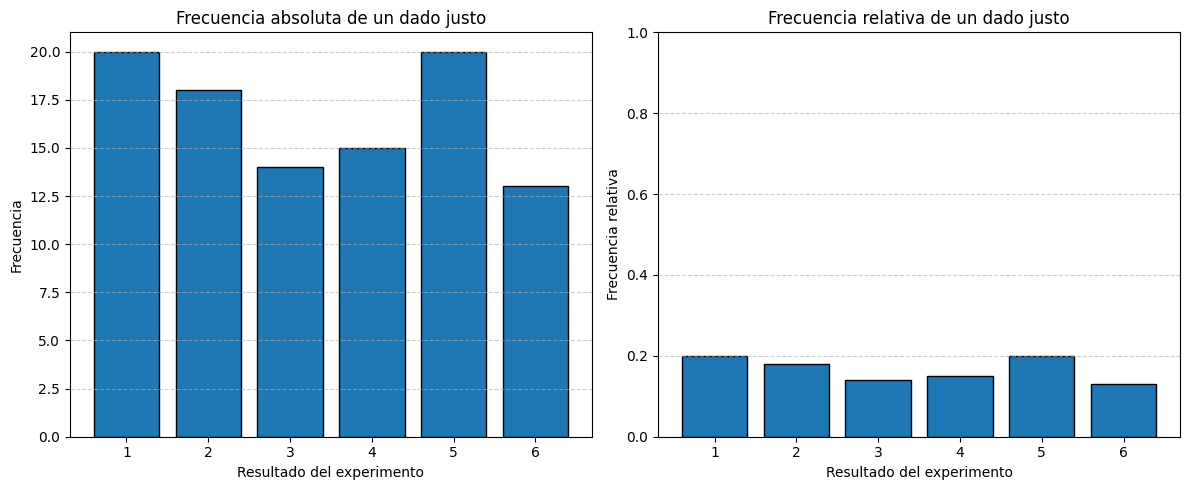

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

def lanzar_dado():
    import random
    return random.randint(1, 6)

# Simulación de datos
n = 100
datos = [lanzar_dado() for _ in range(n)]

# Conteo de ocurrencias
conteo = Counter(datos)
valores = range(1, 7)
frecuencias = [conteo[k] for k in valores]
frecuencias_relativas = [f / n for f in frecuencias]

# Crear figura con dos subgráficas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de frecuencia absoluta
axs[0].bar(valores, frecuencias, edgecolor='black')
axs[0].set_title("Frecuencia absoluta de un dado justo")
axs[0].set_xlabel("Resultado del experimento")
axs[0].set_ylabel("Frecuencia")
axs[0].set_xticks(valores)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# Histograma de frecuencia relativa
axs[1].bar(valores, frecuencias_relativas, edgecolor='black')
axs[1].set_title("Frecuencia relativa de un dado justo")
axs[1].set_xlabel("Resultado del experimento")
axs[1].set_ylabel("Frecuencia relativa")
axs[1].set_ylim(0, 1)
axs[1].set_xticks(valores)
axs[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## Varibales aleatoria discretas

- Una **variable aleatoria discreta** es aquella que solo puede tomar valores en un conjunto discreto. Es como si pudieras enumerar los resultados posibles.

Una **función de probabilidad** (también llamada **función de masa de probabilidad**) se usa para variables aleatorias discretas y tiene las siguientes caracteristicas:
- Asocia a cada valor posible de la variable una probabilidad concreta.
- Suma total de las probabilidades es 1.

**Por ejemplo:**
La variable $X$ que representa el resultado de un dado tiene:
$$
P(X=k)=\frac{1}{6}, \qquad para \quad k\in\{1,2,3,4,5,6\}
$$

## Varibales aleatorias continuas

- Una **variable aleatoria continua** puede tomar valores dentro de un conjunto continuo(uno o varios intervalos). 

Una **función de densidad de probabilidad** se usa para variables aleatorias continuas y  tiene las siguientes caracteristicas:

- Asocia a cada número real $x$ una densidad, no una probabilidad directa.

- La probabilidad de que la variable tome exactamente un valor $x$ es cero:
$$
P(X=x)=0
$$

Lo que tiene sentido es la probabilidad de un intervalo:
$$
P(a\leq X\leq b)=\int_{a}^{b}f(x)dx
$$

**Ejemplo: Uniforme continua en [0, 1]**

La variable $X \sim U(0,1)$ tiene función de densidad:

$$
f(x) = \begin{cases}
1, & 0 \leq x \leq 1, \\
0, & \text{en otro caso}.
\end{cases}
$$

- Es constante en el intervalo, porque **todos los valores son igualmente probables** (en densidad).
- El área total bajo la curva es 1.


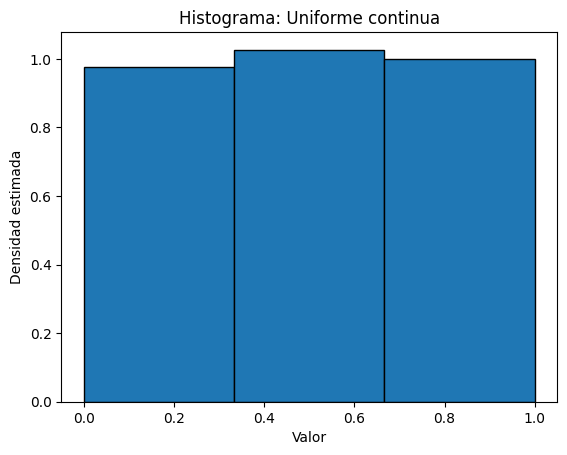

In [15]:
import numpy as np

# Uniforme en [0, 1]
datos_continuos = np.random.uniform(0, 1, size=10000)
plt.hist(datos_continuos, bins=3, density=True, edgecolor='black')
plt.title("Histograma: Uniforme continua")
plt.xlabel("Valor")
plt.ylabel("Densidad estimada")
plt.show()

## Variable aleatoria de Poisson
La variable aleatoria de Poisson $X \sim \text{Poisson}(\lambda)$ modela el número de eventos que ocurren en un intervalo fijo de tiempo o espacio, cuando dichos eventos suceden:

- de forma independiente,

- a una tasa promedio constante $\lambda$,

- sin ocurrencias simultáneas.

**Interpretaciones comunes de una variable de Poisson:**
1. Número de llamadas que llegan a una central telefónica en una hora.
2. Número de accidentes de tráfico en una intersección por día.
3. Número de errores tipográficos por página en un libro.
4. Número de partículas que impactan un detector en un segundo.

Su función de masa de probabilidad esta dada por :
$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad \text{para } k \in \mathbb{N}\cup\{0\}
$$

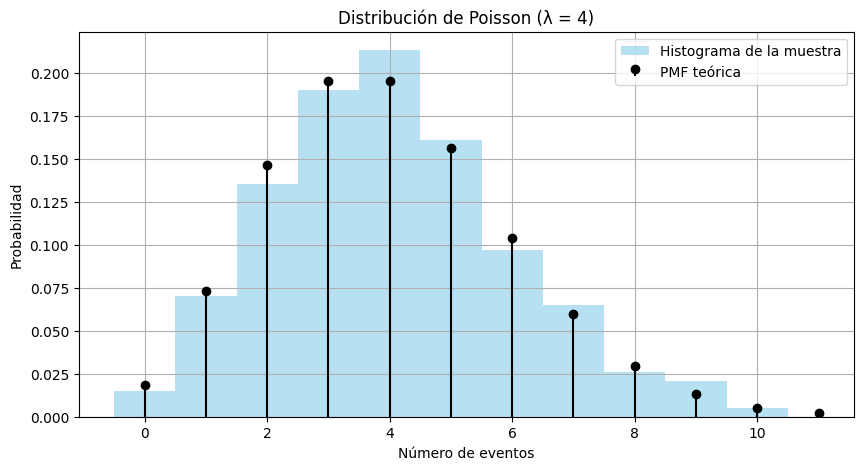

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetro de la distribución
lam = 4  # media de eventos por intervalo
n = 1000  # tamaño de la muestra

# Simulación
muestra = np.random.poisson(lam=lam, size=n)

# Rango de valores posibles
valores = np.arange(0, np.max(muestra) + 1)
pmf_teorica = poisson.pmf(valores, mu=lam)

plt.figure(figsize=(10, 5))

# Histograma de la muestra simulada
plt.hist(muestra, bins=valores - 0.5, density=True, alpha=0.6, color='skyblue', label='Histograma de la muestra')

# PMF teórica
plt.stem(valores, pmf_teorica, linefmt='k-', markerfmt='ko', basefmt=" ", label='PMF teórica')

plt.xlabel('Número de eventos')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson (λ = {})'.format(lam))
plt.legend()
plt.grid(True)
plt.show()

## Variable aleatoria exponencial
La variable aleatoria exponencial $T \sim \text{Exponencial}(\lambda)$ modela el tiempo que transcurre entre eventos que ocurren de manera independiente a una tasa promedio constante $\lambda$.

**Interpretaciones comunes:**
1. Tiempo hasta que llega la próxima llamada telefónica.
2. Tiempo entre fallas de un componente electrónico.
3. Tiempo entre clientes que llegan a una caja de supermercado.
4. Tiempo de espera en un sistema de colas.

Su función de densidad esta dada por:
$$
f(t) = \lambda e^{-\lambda t}, \quad \text{para } t \geq 0
$$

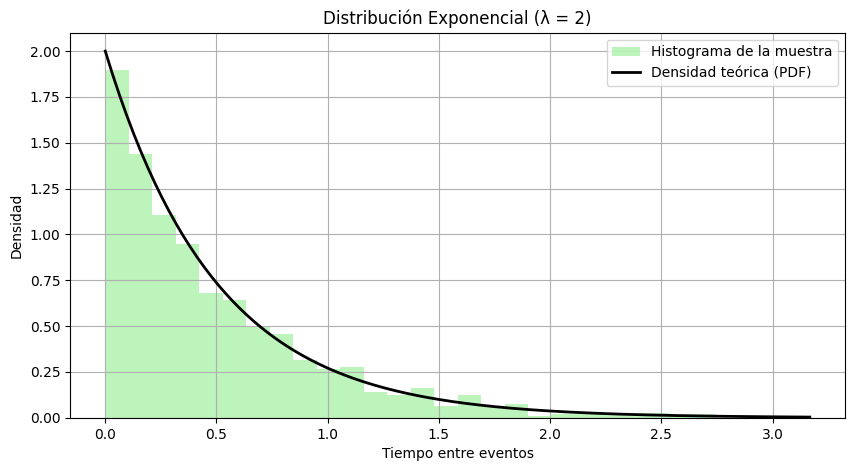

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parámetro de la distribución
lam = 2  # tasa de ocurrencia (λ)
n = 1000  # tamaño de la muestra

# Simulación (nota: scipy y numpy usan escala = 1/λ)
muestra = np.random.exponential(scale=1/lam, size=n)

# Rango de valores para la densidad teórica
x = np.linspace(0, np.max(muestra), 200)
pdf_teorica = lam * np.exp(-lam * x)  # f(t) = λ e^{-λt}


plt.figure(figsize=(10, 5))

# Histograma de la muestra simulada
plt.hist(muestra, bins=30, density=True, alpha=0.6, color='lightgreen', label='Histograma de la muestra')

# Densidad teórica
plt.plot(x, pdf_teorica, 'k-', lw=2, label='Densidad teórica (PDF)')

plt.xlabel('Tiempo entre eventos')
plt.ylabel('Densidad')
plt.title('Distribución Exponencial (λ = {})'.format(lam))
plt.legend()
plt.grid(True)
plt.show()

## Ejercicios:
**Resuelve 5 de los siguientes poblemas mediante simulación Monte Carlo con al menos 10,000 repeticiones.**  

Antes de encontrar la probabilidad con simulaciones, da una estimación del resultado usando tu intuición. La respuesta no será evaluada con respecto al resultado correcto sino a la argumentación que se proporcione. 

**Los ejercicios 6 y 9 son obligatorios**

1. Si cortas una bara de longitud 1 en tres partes al azar. ¿Cuál es la probabilidad de que esas tres partes puedan formar un triángulo?

Hint: Recuerda que para que tres longitudes $a,b,c$ formen un triángulo, deben cumplir la desigualdad triangular entre todas 
$$
a+b>c,\qquad a+c>b, \qquad b+c>a
$$

2. En una línea de metro, los pasajeros llegan a un vagón durante un intervalo de 10 minutos siguiendo una distribución de Poisson con media $λ=4$ pasajeros por minuto.

El vagón tiene capacidad máxima para 45 personas.

¿Cuál es la probabilidad de que el vagón se llene o se sobrepase su capacidad en ese lapso de 10 minutos?



3. En una cafetería, los clientes llegan de forma aleatoria. El tiempo entre llegadas sigue una distribución exponencial con media de 3 minutos (es decir,$\lambda=\frac{1}{3}$)

Un barista se pregunta:
```quote
“¿Cuál es la probabilidad de que tenga que esperar más de 5 minutos antes de que llegue el siguiente cliente?”
```

4. En un salón con 23 personas, ¿cuál es la probabilidad de que al menos dos personas compartan cumpleaños?

Nota: El comando `random.choice()` en Python es una herramienta muy útil para elegir un elemento al azar de una lista (o cualquier secuencia). Es parte del módulo `random`.

Supongamos que tienes una lista de frutas y quieres elegir una al azar:

```python
import random

frutas = ['manzana', 'plátano', 'naranja', 'kiwi']
fruta_aleatoria = random.choice(frutas)

print(f"Hoy comerás: {fruta_aleatoria}")
```

5. Dos amigos acuerdan encontrarse entre las 12:00 y las 13:00. Cada uno llega en un momento aleatorio dentro de esa hora y espera 15 minutos.
¿Cuál es la probabilidad de que se encuentren?

6. Se tienene tres cajas:

- Una contiene dos bolas blancas (BB)

- Una contiene una blanca y una negra (BN)

- Una contiene dos bolas negras (NN)

Se elige una caja al azar, se extrae una bola al azar, y resulta ser blanca.
¿Cuál es la probabilidad de que la otra bola en la misma caja también sea blanca?

7. Se barajan $n$ cartas numeradas del 1 al $n$, y se voltean una a una.
¿Cuál es la probabilidad de que ninguna carta esté en su lugar original?

8. Generas números aleatorios entre 0 y 1 hasta que su suma supere 1.
¿Cuántos números esperas generar?

9. Estás en un concurso y te presentan **tres puertas**.

- Detrás de **una** de ellas hay un **premio**.
- Detrás de las otras **no hay premio**.

El juego funciona así:

1. El concursante elige una puerta al azar (pero no la abre).
2. El anfitrión, que **sabe dónde está el premio**, abre una de las otras **dos puertas** que **no tiene premio**.
3. Luego te pregunta:

> “¿Quieres quedarte con tu elección inicial o cambiar a la otra puerta que queda cerrada?”

---

**Pregunta:**

> ¿Cuál es la probabilidad de ganar si te quedas con tu elección original?  
> ¿Cuál es la probabilidad de ganar si cambias de puerta?
